### Clustering Methods 
the two most popular 
* K-means 
* hierarchical clustering.



In [22]:
library(repr)
library(tidyverse)
library(survival) # for colon cancer dataset
library(ISLR2)

In [2]:
# stimulated data with 2 clusters 

set.seed(2)
x <- matrix(rnorm(50*2), ncol = 2)
x[1:25, 1] <- x[1:25, 1] + 3
x[1:25, 2] <- x[1:25, 2] - 4

In [3]:
# perform k-mean clustering with k =2 

km.out <- kmeans(x, 2, nstart = 20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

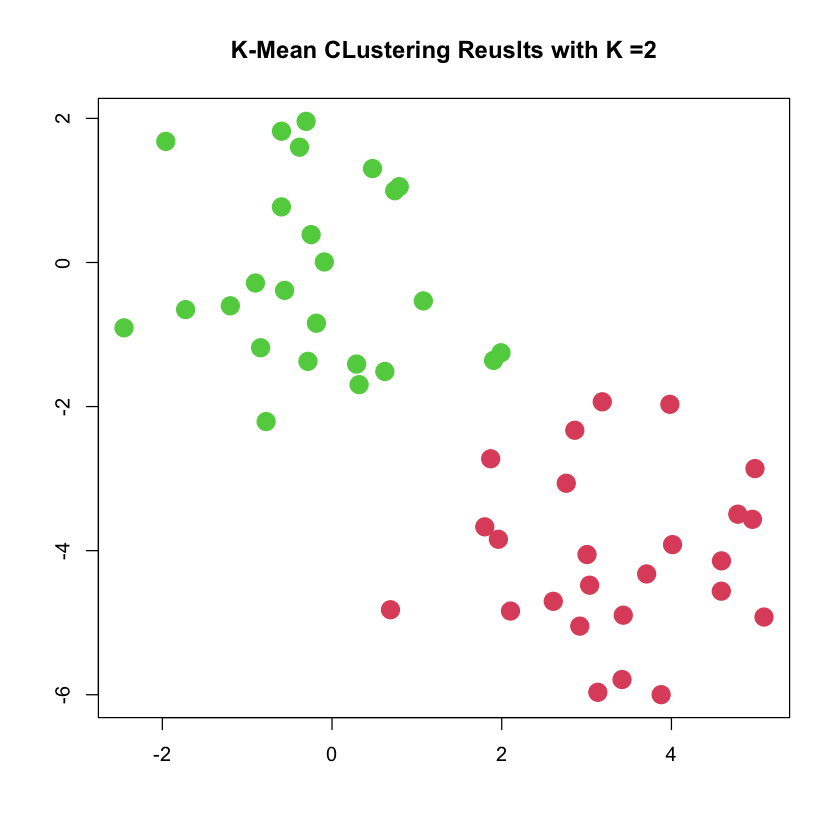

In [4]:


plot(x, col = (km.out$cluster + 1), 
	main = "K-Mean CLustering Reuslts with K =2", 
	xlab = "", ylab = "" , pch = 20, cex = 3
	)


In [5]:
set.seed(4)
km.out <- kmeans(x, 3, nstart = 30)
km.out

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

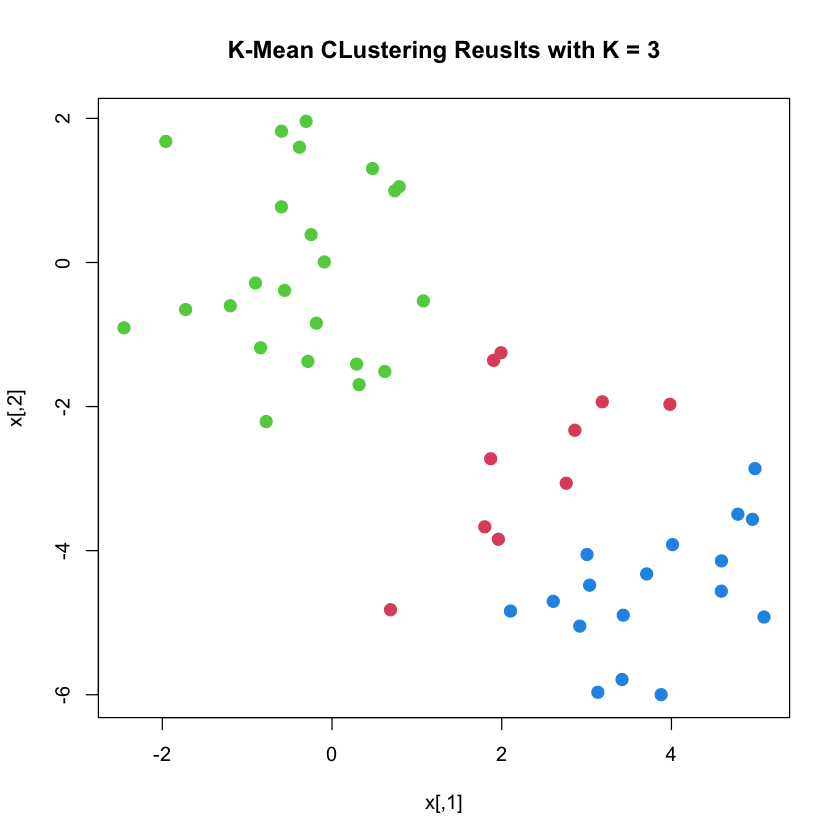

In [6]:
plot(x, col = (km.out$cluster + 1),
     main = "K-Mean CLustering Reuslts with K = 3",
    pch = 20, cex = 2)

* When 𝐾=3 : nstart used to initialize multiple cluster assignment.
* kmeans() will report only best results 

In [7]:
set.seed(4)
km.out <- kmeans(x, 3, nstart = 1)
km.out$tot.withinss


[1] 104.3319

In [8]:
km.out <- kmeans(x, 3, nstart = 20)
km.out$tot.withinss

[1] 97.97927

* km.out$tot.withinss is the total within-cluster sum of squares, which we seek to minimize by performing 𝐾-means clustering. 
* The individual within-cluster sum-of-squares are contained km.out$withinss.
* always running 𝐾-means clustering with a large value of nstart, such as 20 or 50, since otherwise an undesirable local optimum may be obtained.
* also, always use set.seet() for reproducibility. 

### Hierarchical Clustering

* hclust() ;  hierarchical clustering
* plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure
* We begin by clustering observations using complete linkage. The dist() : inter-observation Euclidean distance matrix.


In [9]:
hc.complete <- hclust(dist(x), method = "complete")

In [10]:
hc.average <- hclust(dist(x), method = "average")
hc.single <- hclust(dist(x), method = "single")

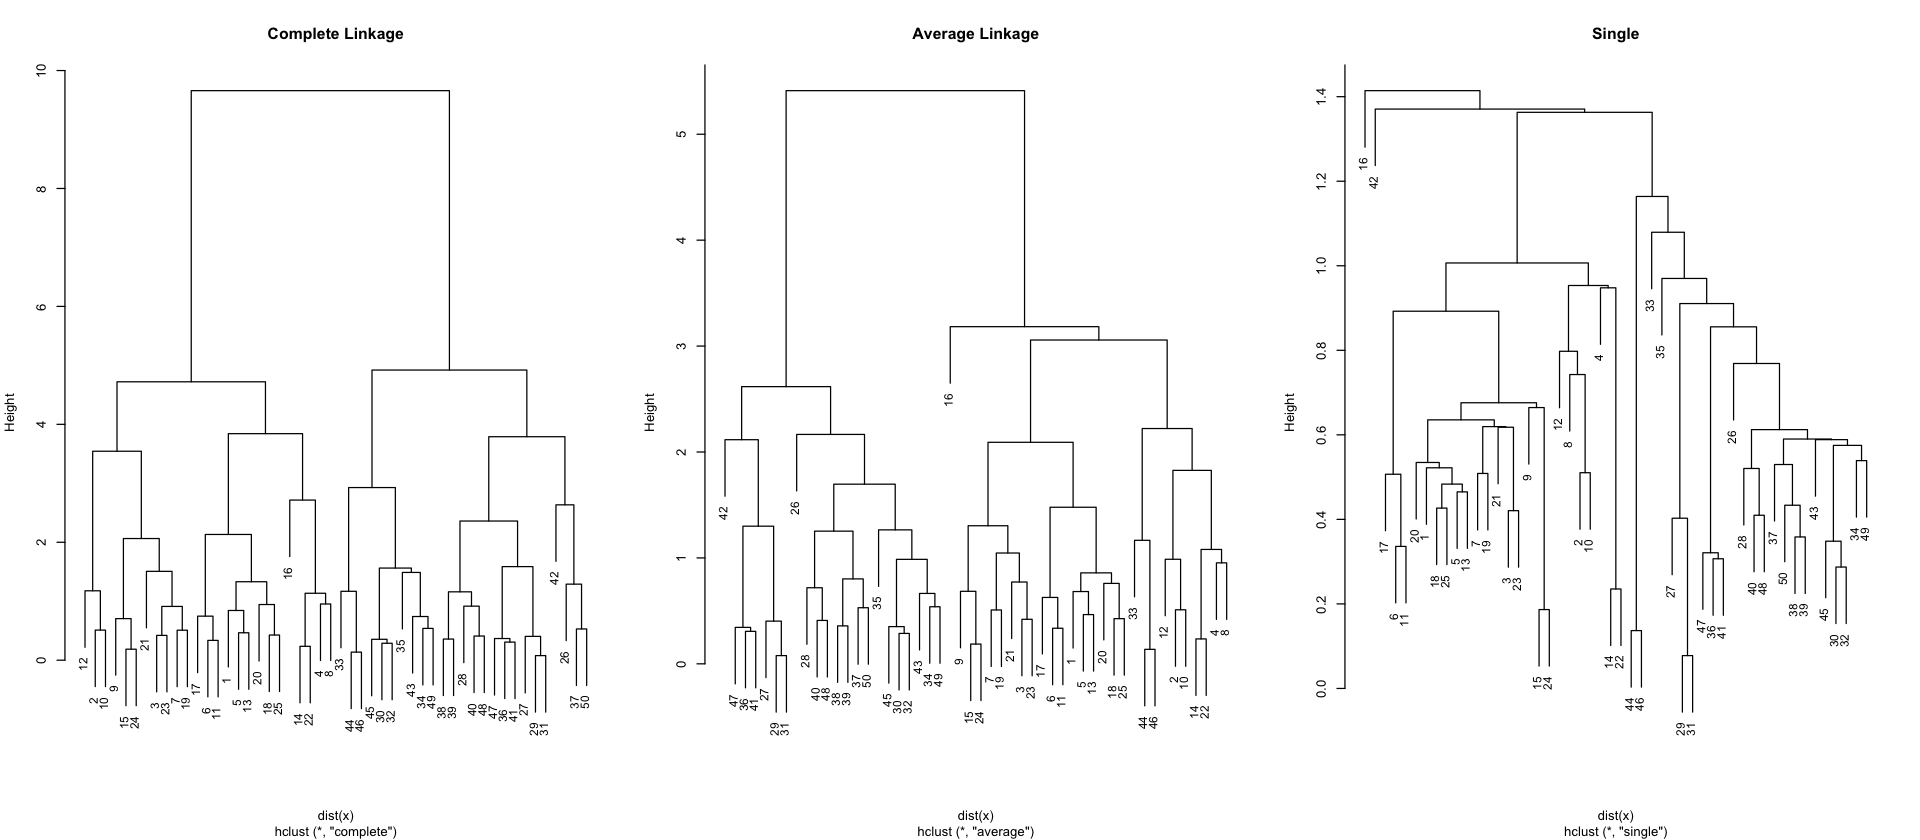

In [12]:
options(repr.plot.width = 16, repr.plot.height = 7) 
par(mfrow = c(1,3))
plot(hc.complete, cex = 0.9, main = "Complete Linkage")
plot(hc.average, cex = 0.9, main = "Average Linkage")
plot(hc.single, cex = 0.9, main = "Single")

In [13]:
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [14]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

In [15]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

* To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the cutree() function
* The second argument to cutree() is the number of clusters we wish to obtain.
* For this data, complete and average linkage generally separate the observations into their correct groups. However, single linkage identifies one point as belonging to its own cluster. A more sensible answer is obtained when four clusters are selected, although there are still two singletons.



In [16]:
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

### 
* The second argument to cut trees is number of clusters we wish to obtain. 
* For this data complete and average linkage generally seperate the observation into their correct groups. 
* However, single linkage identifies one point as belonging to its own cluster. 
* A more sensible answer is obtained when 4 clusters are sleected, although there are still two singletons. 

##### Scale before heirachical clustering 

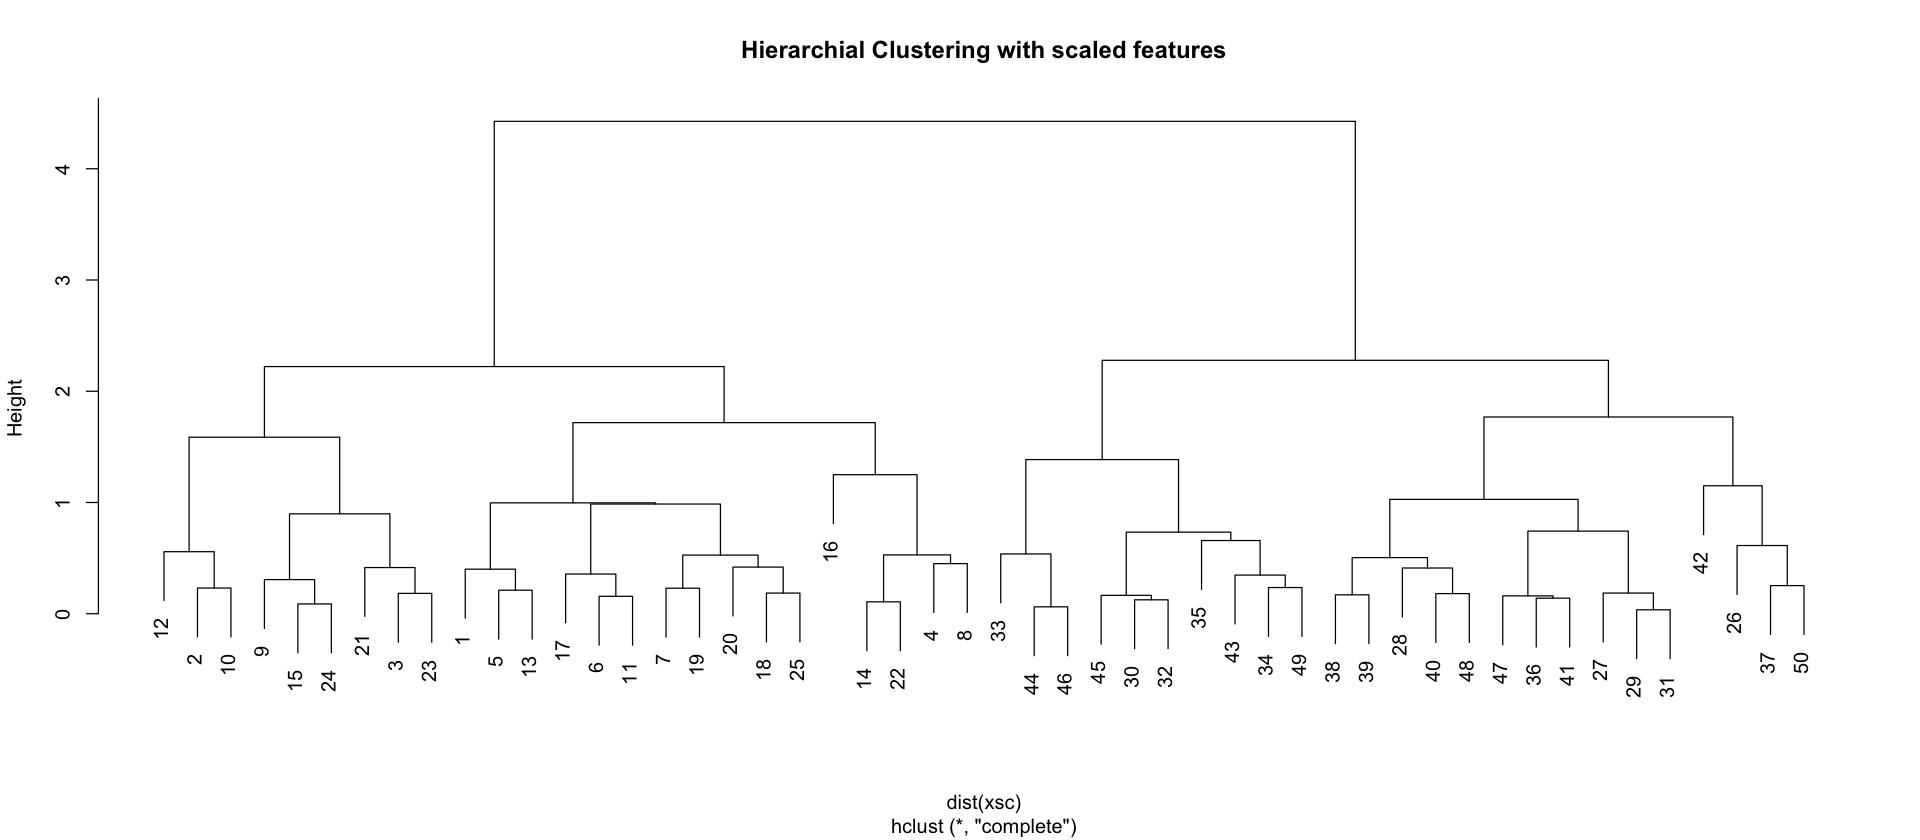

In [17]:
# to scale the variables before performing heirachical clustering of the observation

xsc <- scale(x)
plot(hclust(dist(xsc), method = "complete"),
	main = "Hierarchial Clustering with scaled features")

##### Corelation matrics for clustering 
* Make sense for atleast 3 or more features. 

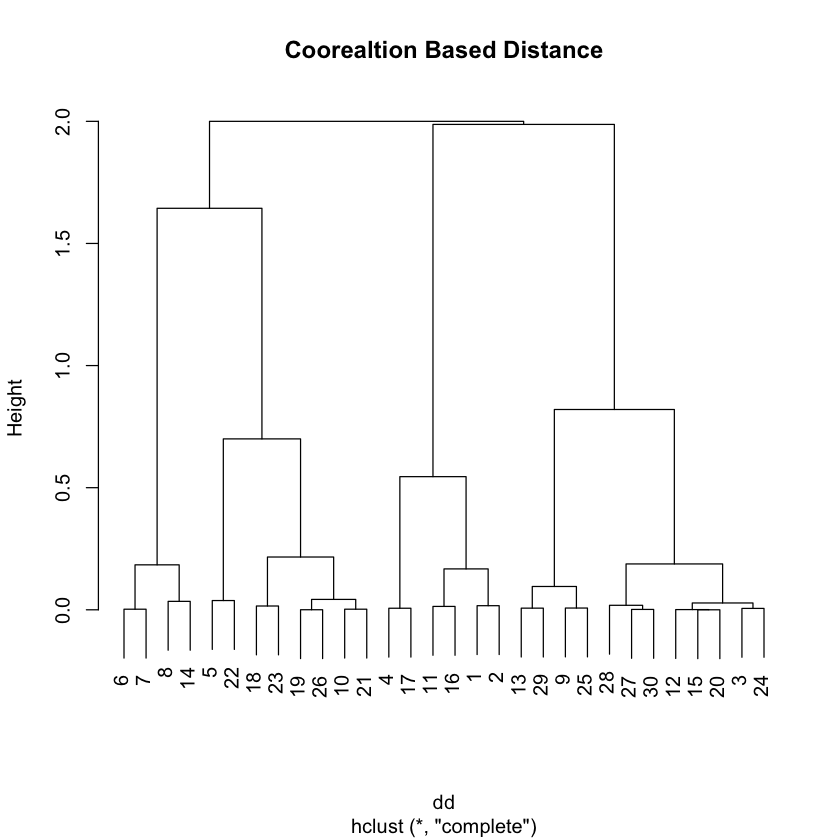

In [5]:
x <- matrix(rnorm(30*3), ncol = 3)
dd <- as.dist(1 - cor(t(x)))
plot(hclust(dd, method = "complete"),
    main = "Coorealtion Based Distance")

### NCI60 Data Example

In [26]:
# NCI60 Data Example
#Unsupervised tech used in genomic data, esp PCA and Hierarchial clustering. 
# Data : NCI cancer cell microarray data - 6,830 gene expression measurements on 64 cancer cell lines. 

library(ISLR2)


In [27]:
data("NCI60")  

In [31]:
nci.labs <- NCI60$labs
nci.data <- NCI60$data

In [35]:
dim(nci.data)

[1]   64 6830

In [38]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

### PCA on the NCI60 Data

In [40]:
# first perform PCA on data after scaling variables (genes) to have SD 1 

pr.out <- prcomp(nci.data, scale = TRUE)



In [41]:
# plot first few PC score vectors. 
# the observations (cell lines) corresponding to a given cancer type will be plotted with same color. 
# so we see to what extent the observations within a cancer type are similar to each other.
# We create function that assigns a distinct color to each element of numeric vector. 
# The function will be used to assign a color to each of 64 cell lines, based on cancer type to which it corresponds


Cols <- function(vec){
	cols <- rainbow(length(unique(vec)))
	return(cols[as.numeric(as.factor(vec))])
}

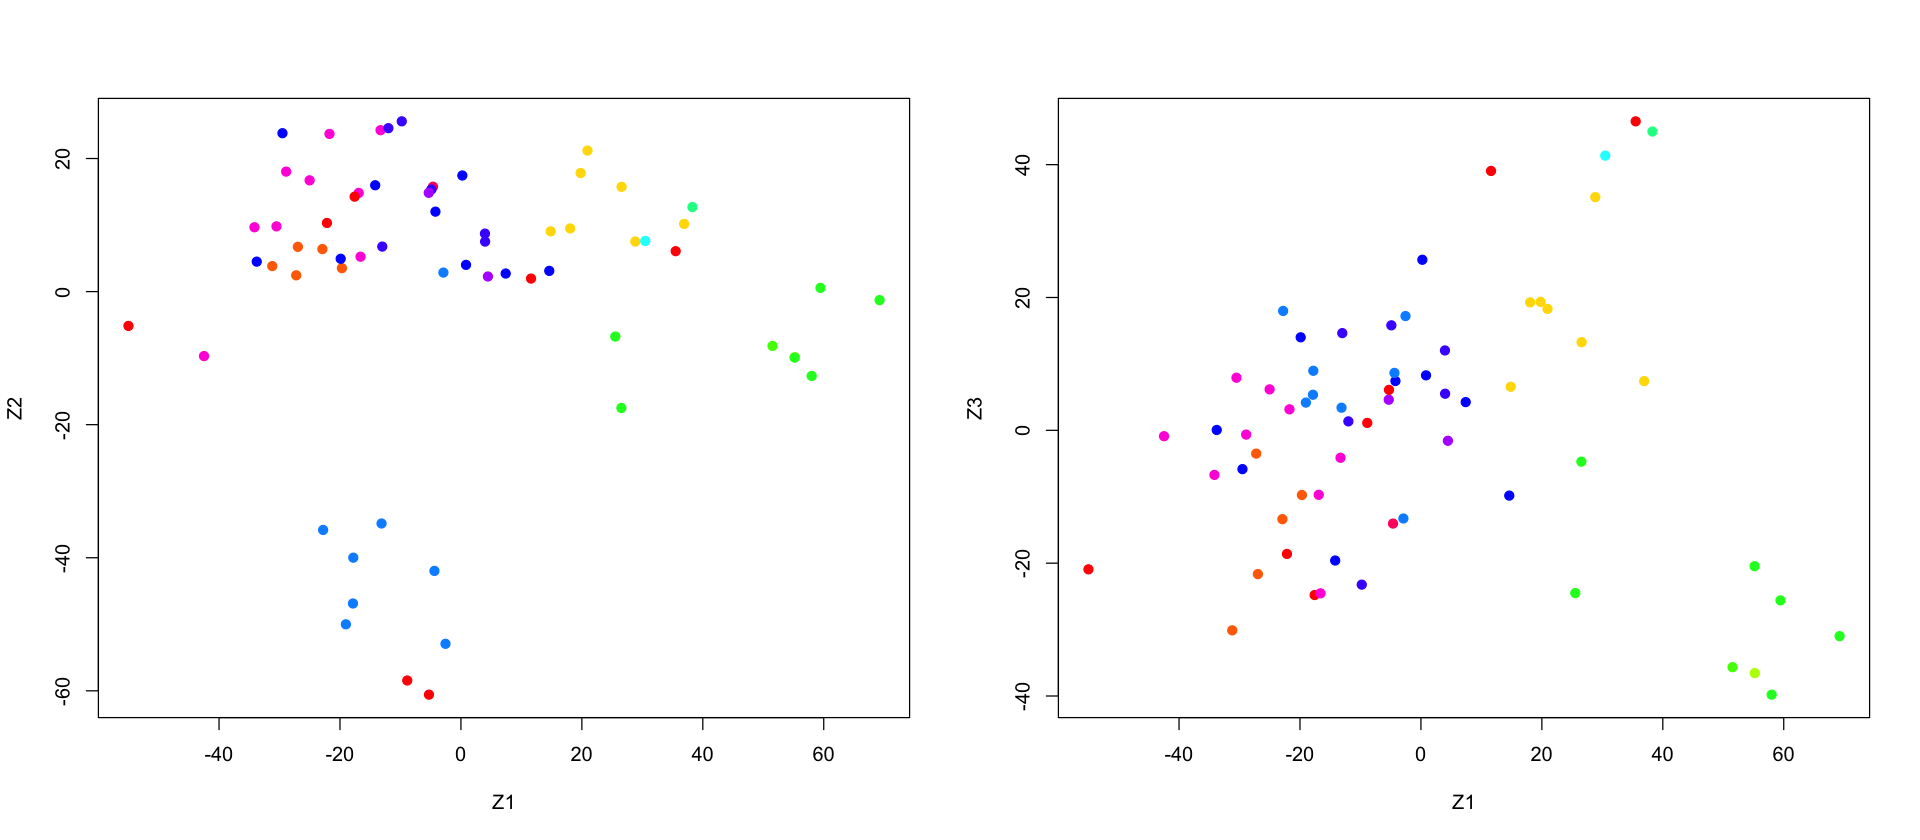

In [43]:
options(repr.plot.width = 16, repr.plot.height = 7) 
par(mfrow = c(1, 2))
plot(pr.out$x[, 1:2], col = Cols(nci.labs), pch = 19,
    xlab = "Z1", ylab = "Z2")
plot(pr.out$x[, c(1, 3)], col = Cols(nci.labs), pch = 19,
    xlab = "Z1", ylab = "Z3")

### 
* cell lines corresponding to a single cancer type tend to have similar values on the first few PC score vectors. 
* this indicates that cell lines from same cancer type tend to have pretty similar gene expression levels.

In [47]:
# Obtain a summary of the proportion of variance explained (PVE) of the first few PC
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

In [56]:
# pve
summary(pr.out)$importance[2, ]

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10 
0.11359 0.06756 0.05752 0.04248 0.03735 0.03619 0.03066 0.02686 0.02529 0.02376 
   PC11    PC12    PC13    PC14    PC15    PC16    PC17    PC18    PC19    PC20 
0.02357 0.02164 0.02049 0.01979 0.01915 0.01772 0.01663 0.01611 0.01594 0.01560 
   PC21    PC22    PC23    PC24    PC25    PC26    PC27    PC28    PC29    PC30 
0.01507 0.01480 0.01436 0.01363 0.01324 0.01275 0.01259 0.01210 0.01181 0.01121 
   PC31    PC32    PC33    PC34    PC35    PC36    PC37    PC38    PC39    PC40 
0.01083 0.01045 0.01026 0.00988 0.00974 0.00931 0.00915 0.00896 0.00873 0.00843 
   PC41    PC42    PC43    PC44    PC45    PC46    PC47    PC48    PC49    PC50 
0.00814 0.00790 0.00739 0.00720 0.00709 0.00690 0.00678 0.00647 0.00641 0.00601 
   PC51    PC52    PC53    PC54    PC55    PC56    PC57    PC58    PC59    PC60 
0.00566 0.00563 0.00539 0.00513 0.00512 0.00482 0.00438 0.00410 0.00369 0.00321 
   PC61    PC62    PC63    PC64 
0.00255 0.00244 0.00239 0.00000

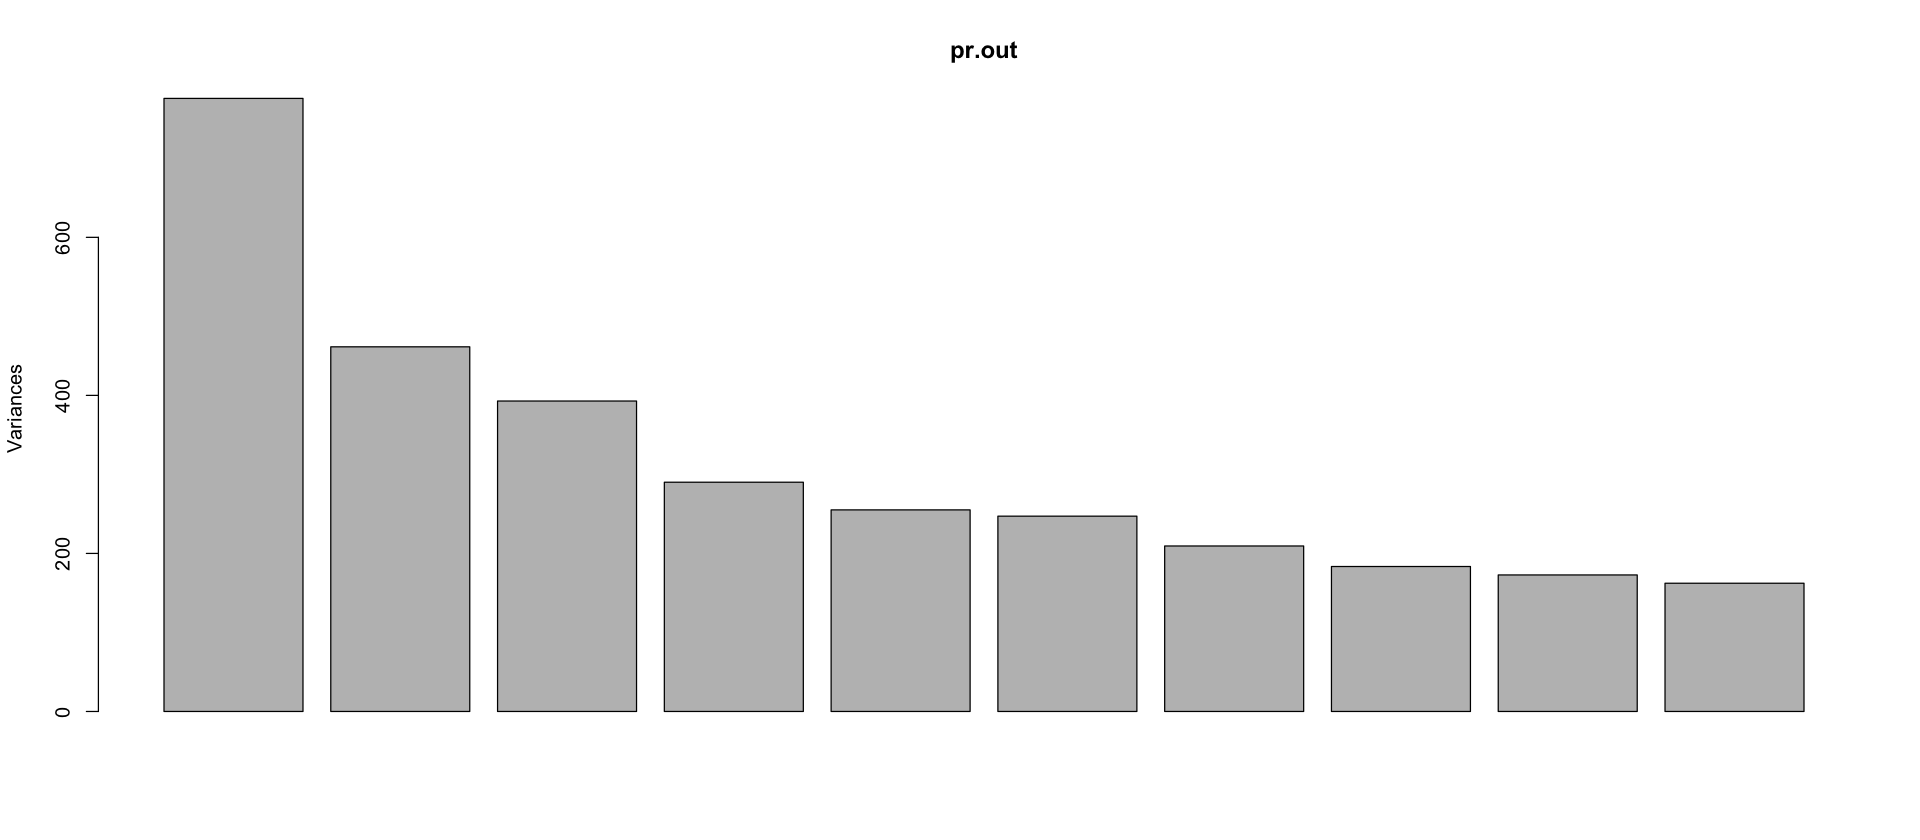

In [48]:
# plot variance explained by the first few PC

plot(pr.out)
 

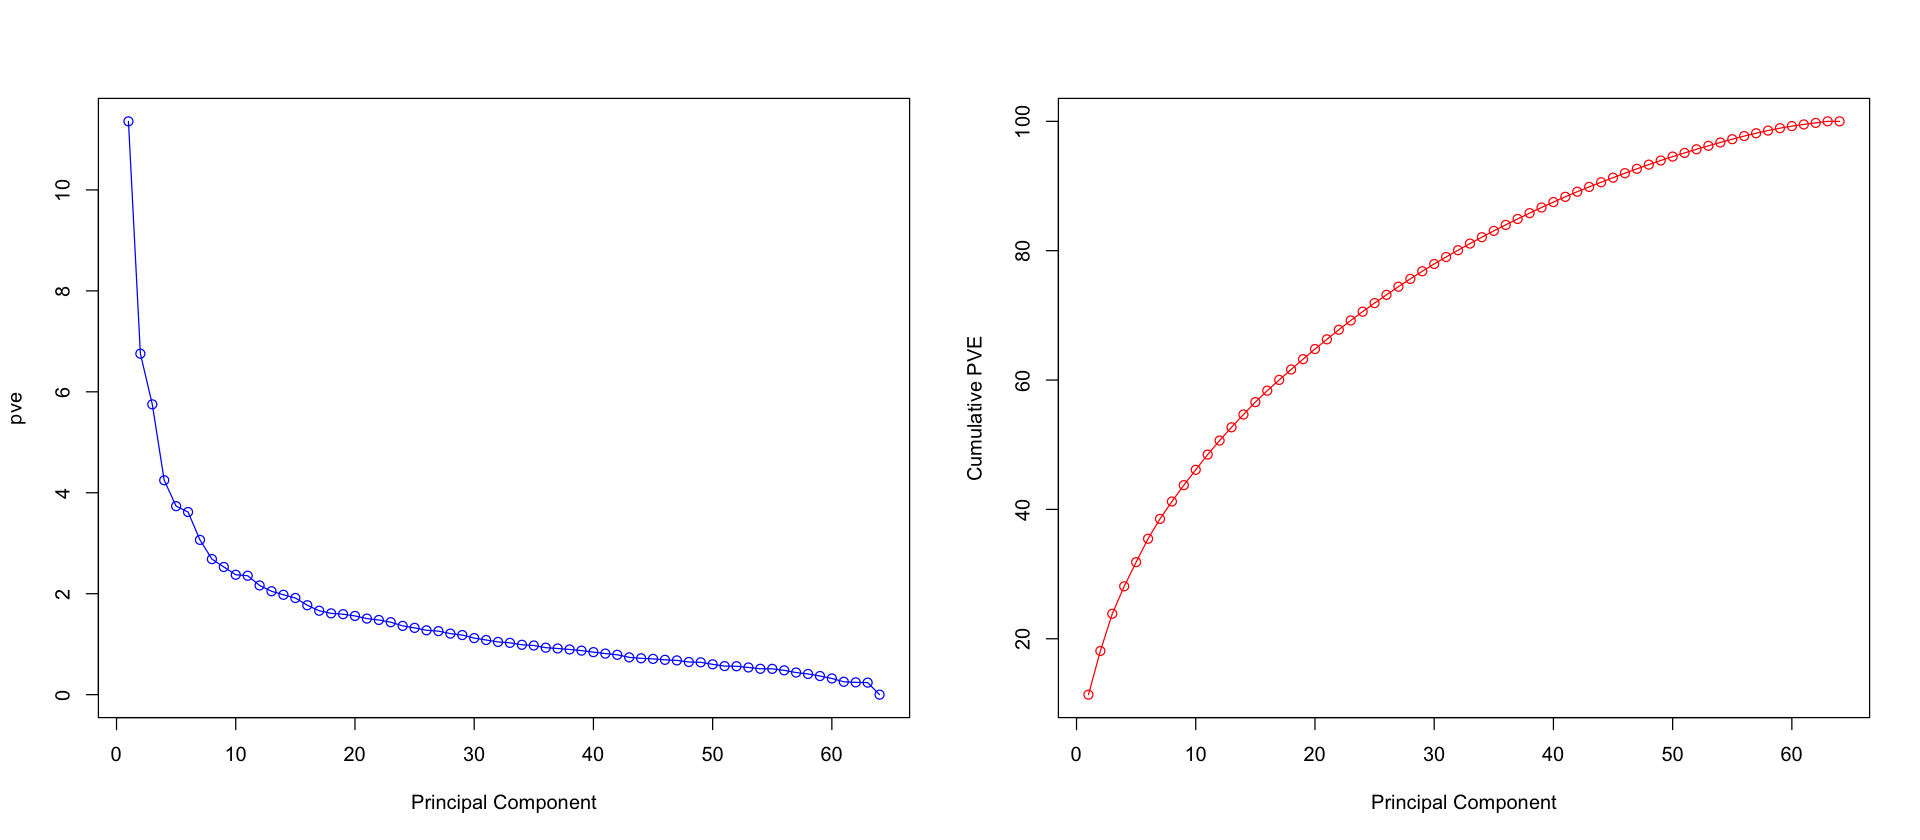

In [61]:
pve <- 100 * pr.out$sdev^2 / sum(pr.out$sdev^2)
par(mfrow = c(1,2))
plot(pve, type = "o", xlab = "Principal Component", col = "blue")
plot(cumsum(pve), type = "o",  ylab = "Cumulative PVE", xlab = "Principal Component", col = "red")

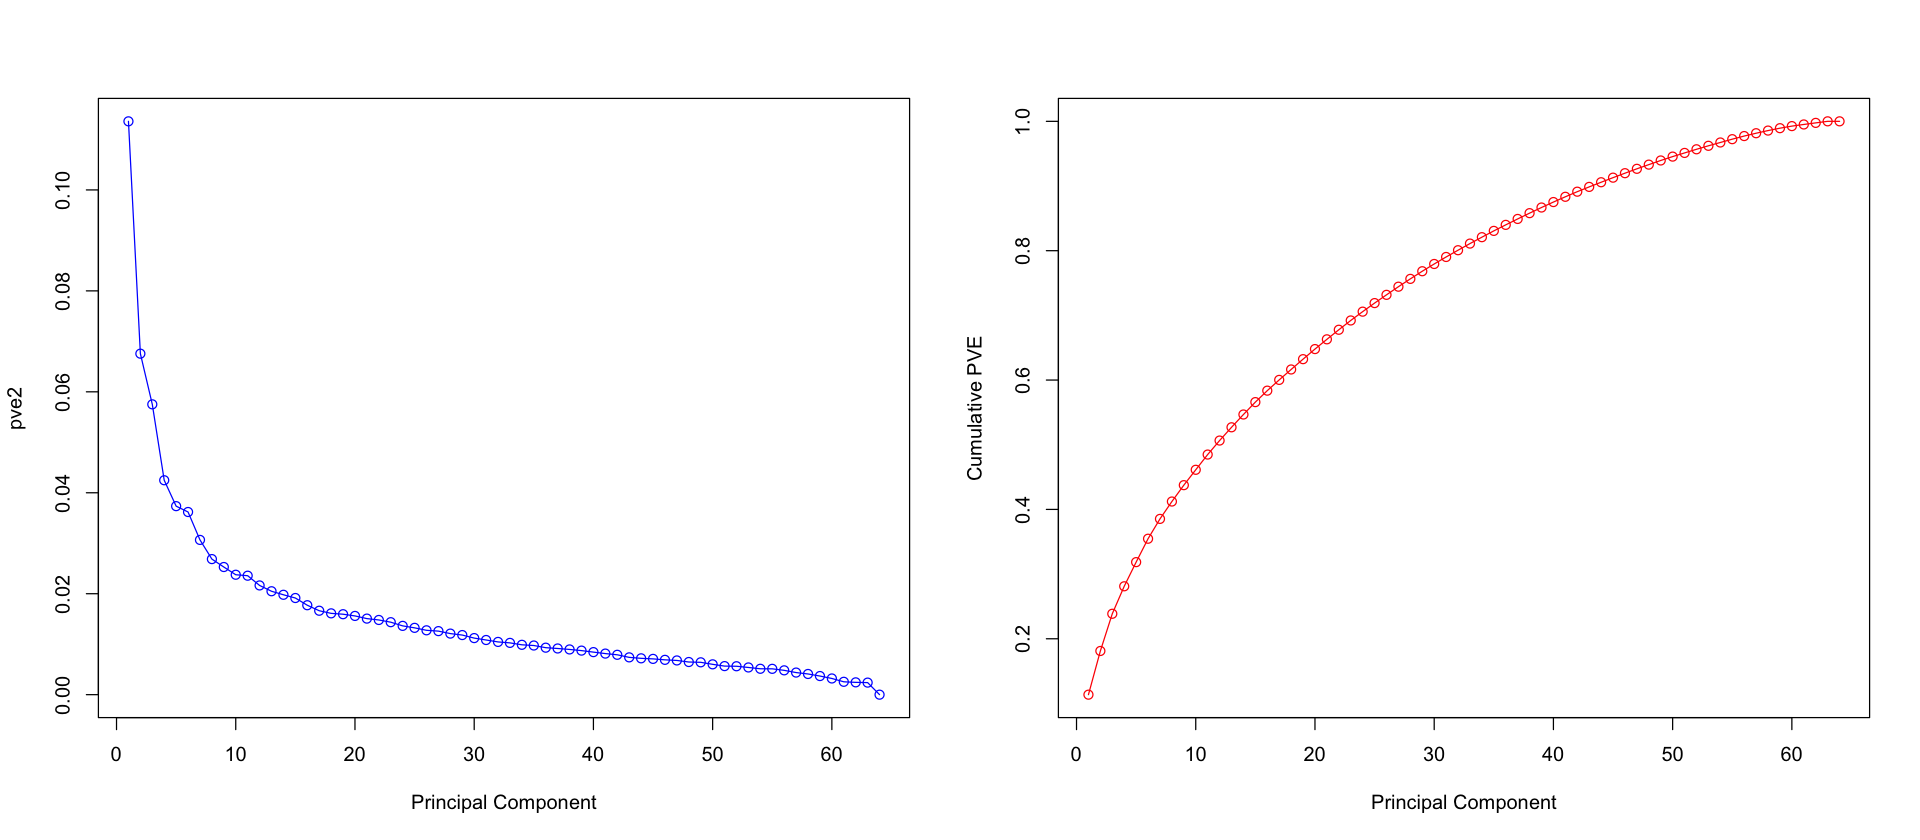

In [60]:
pve2 <- summary(pr.out)$importance[2, ]
par(mfrow = c(1,2))
plot(pve2, type = "o", xlab = "Principal Component", col = "blue")
plot(cumsum(pve2), type = "o",  ylab = "Cumulative PVE", xlab = "Principal Component", col = "red")

#### 2 ways to calculate PVE 
* pve <- 100 * pr.out$sdev^2 / sum(pr.out$sdev^2)
* pve2 <- summary(pr.out)$importance[2, ]

### 
* the first seven principal components together explain around 40% of the variance in the data. This is not big amount of the variance.
* but, looking at the scree plot, there is a marked decrease in the variance explained by after 7 principal components. 

### Clustering the Observations of the NCI60 Data

In [62]:
# scale 
sd.data <- scale(nci.data)

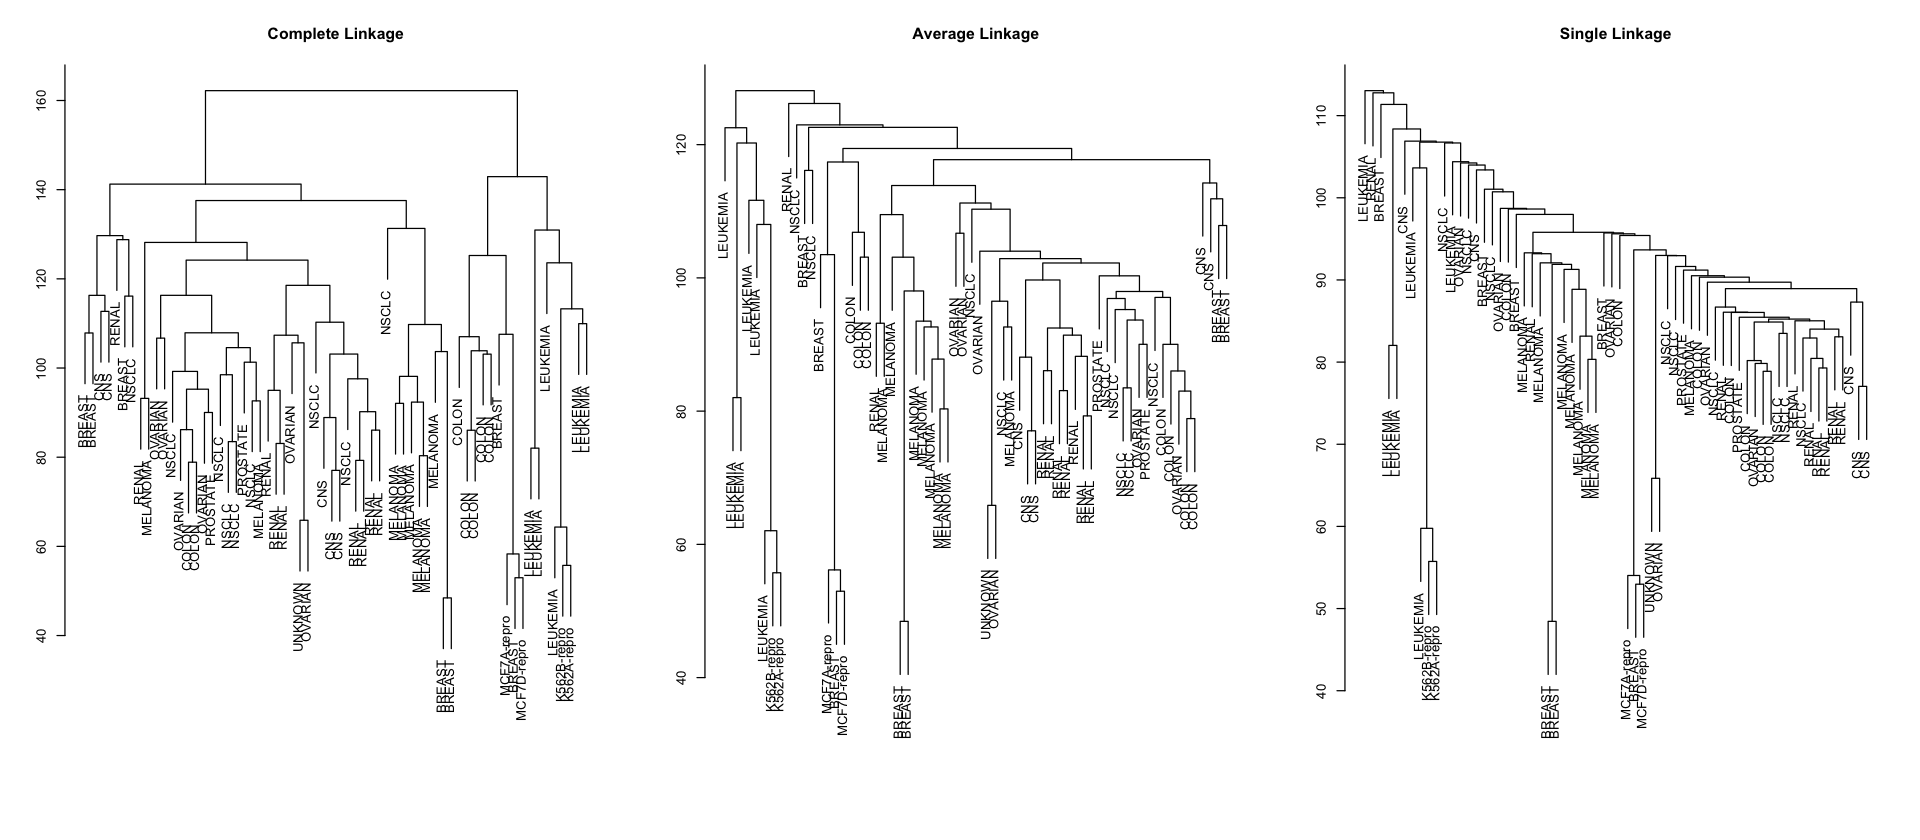

In [64]:
#  Euclidean distance is used as the dissimilarity measure
par(mfrow = c(1, 3))
data.dist <- dist(sd.data)
plot(hclust(data.dist), xlab = "", sub = "", ylab = "",
    labels = nci.labs, main = "Complete Linkage")
plot(hclust(data.dist, method = "average"),
    labels = nci.labs, main = "Average Linkage",
    xlab = "", sub = "", ylab = "")
plot(hclust(data.dist, method = "single"),
    labels = nci.labs,  main = "Single Linkage",
    xlab = "", sub = "", ylab = "")

### 
* Typically, single linkage will tend to yield trailing clusters ; very large clusters onto which individual observations attach one-by-one.
* complete and average linkage tend to yield more balanced lusters.
* therefore, complete and average linkage are generally preferred to single linkage. 

In [65]:
hc.out <- hclust(dist(sd.data))
hc.clusters <- cutree(hc.out, 4)
table(hc.clusters, nci.labs)


           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

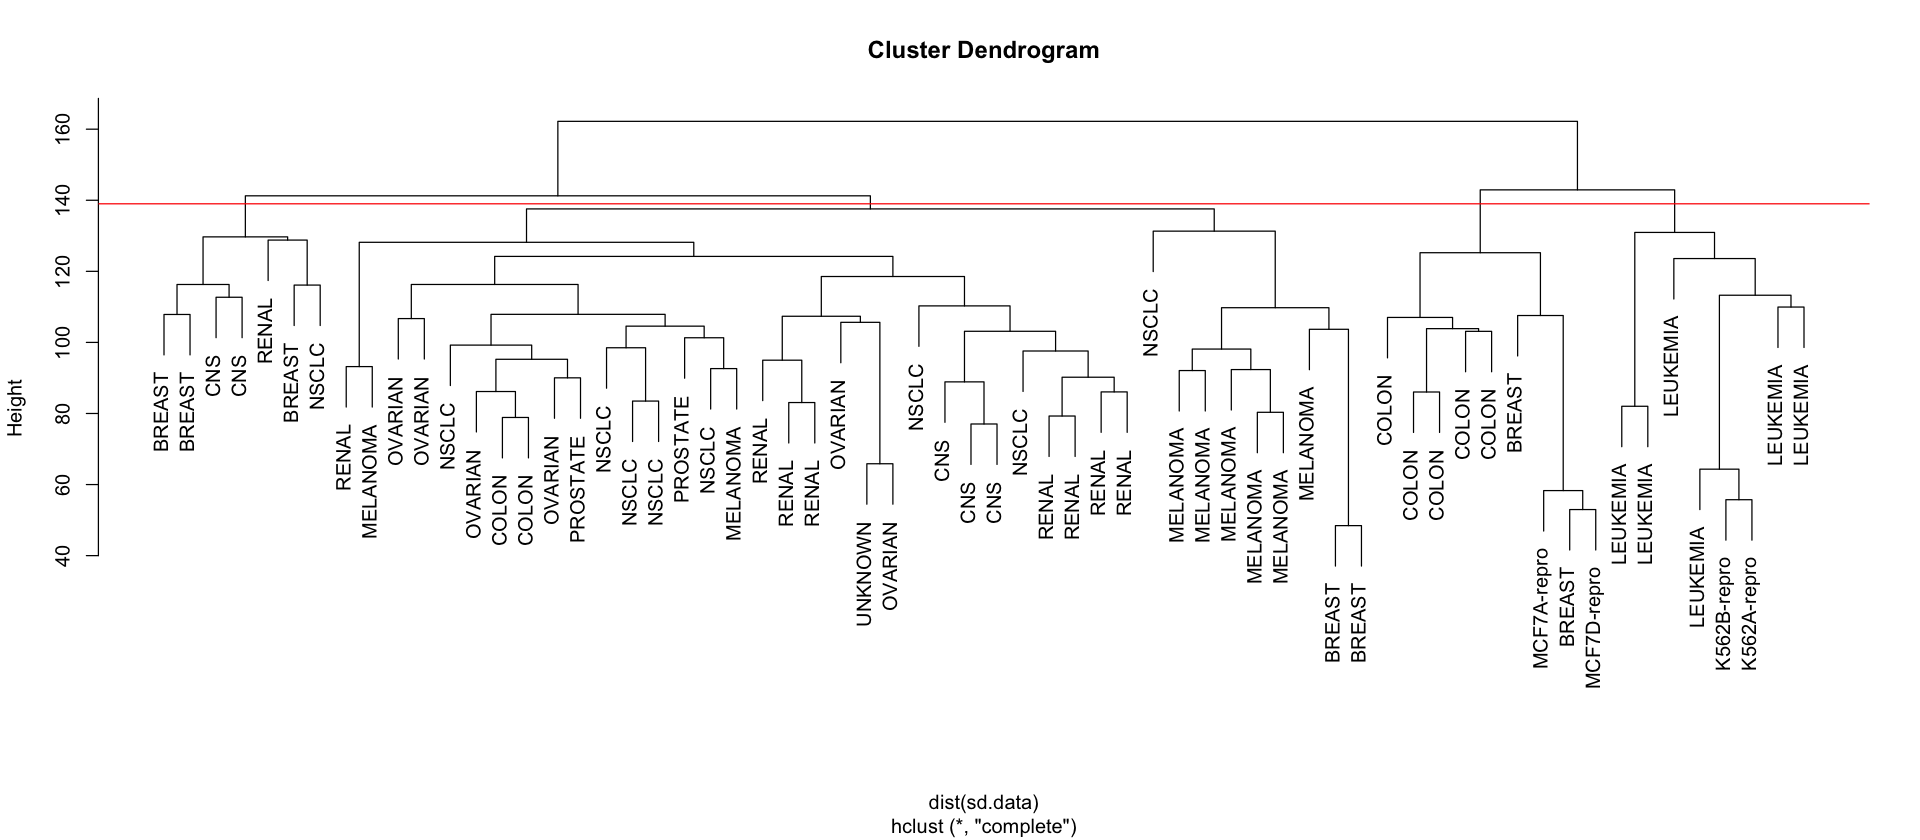

In [66]:
# plot the cut on the dendrogram that produces these four clusters:
par(mfrow = c(1, 1))
plot(hc.out, labels = nci.labs)
abline(h = 139, col = "red")

In [67]:
hc.out



Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 
